### Outlier Treatment

Outliers are the most extremes values in the data. It is an abnormal observations that deviate from the norm.

Outliers do not fit in the normal behavior of the data.

#### Detect Outliers using following methods

1. Boxplot

2. Histogram

3. Scatter plot

4. Z-score

5. Inter quartile range(values out of 1.5 time of IQR)

#### Handle Outlier using following methods

1. Remove the outliers.

2. Replace outlier with suitable values by using following methods:-

    *Quantile method*
    
    *Inter quartile range*

3. Use that ML model which are not sensitive to outliers

4. Like:-KNN, Decision Tree, SVM, Naïve Bayes, Ensemble methods

### 3-Sigma Technique (Standard Deviation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd

In [2]:
data = pd.read_csv('raw_sales.csv')

In [3]:
data

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation
    
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

We multiply by 3 because, according to the empirical rule, 99.7% of normally distributed data lies within ±3 standard deviations of the mean, so values outside this range are statistically rare and considered anomalies.

In [6]:
data.price

0        525000
1        290000
2        328000
3        380000
4        310000
          ...  
29575    500000
29576    560000
29577    464950
29578    589000
29579    775000
Name: price, Length: 29580, dtype: int64

In [7]:
list_1 = find_anomalies(data['price'])

In [8]:
len(list_1)

461

In [9]:
len(data)

29580

In [10]:
data.price.skew()

4.312009366902366

data is positively skwed, not normally distributed

In [11]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Density'>

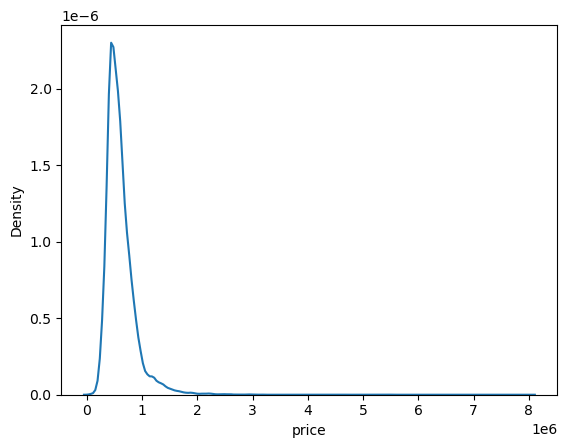

In [12]:
sns.kdeplot(data.price)

In [13]:
data['price_transformed'] = np.log(data.price) # logarithmic scale

In [14]:
data.price_transformed.skew()

0.4731646269984763

In [15]:
list_2 = find_anomalies(data.price_transformed)

In [16]:
len(list_2)

266

In [17]:
len(data)

29580

<Axes: xlabel='price_transformed', ylabel='Density'>

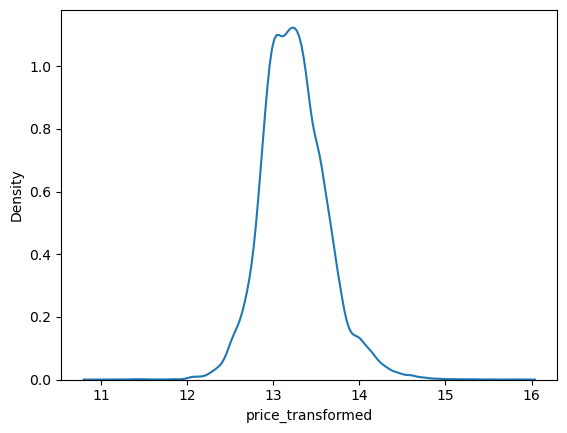

In [18]:
sns.kdeplot(data.price_transformed)

In [19]:
data['price_transformed_double'] = np.log(data.price_transformed)

In [20]:
data['price_transformed_double'].skew()

0.33092530655758573

In [21]:
list_3 = find_anomalies(data.price_transformed_double)

In [22]:
len(list_3)

251

In [23]:
len(data)

29580

Anything below 40, or above 80 are considered as outliers

### Boxplots

<Axes: >

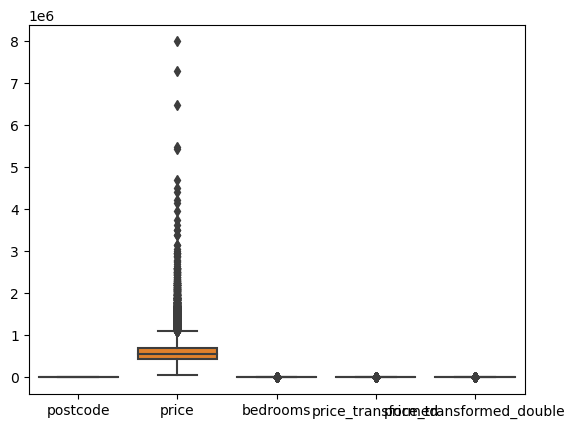

In [25]:
sns.boxplot(data=data)

The above code displays the plot

As you can see, it considers everything above 75 or below ~ -35 to be an outlier. The results are very close to method 1 above.

In [26]:
df = pd.DataFrame(data)
len(df)

29580

In [27]:
df

,datesold,postcode,price,propertyType,bedrooms,price_transformed,price_transformed_double
0,2007-02-07 00:00:00,2607,525000,house,4,13.171154,2.578029
1,2007-02-27 00:00:00,2906,290000,house,3,12.577636,2.531920
2,2007-03-07 00:00:00,2905,328000,house,3,12.700769,2.541663
3,2007-03-09 00:00:00,2905,380000,house,4,12.847927,2.553182
4,2007-03-21 00:00:00,2906,310000,house,3,12.644328,2.537209
...,...,...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3,13.122363,2.574318
29576,2019-07-25 00:00:00,2612,560000,unit,2,13.235692,2.582917
29577,2019-07-26 00:00:00,2912,464950,unit,2,13.049685,2.568764
29578,2019-07-26 00:00:00,2601,589000,unit,2,13.286181,2.586725


In [28]:
# Statistical information of the dataframe columns

df.describe()

,postcode,price,bedrooms,price_transformed,price_transformed_double
count,29580.000000,2.958000e+04,29580.000000,29580.000000,29580.000000
mean,2730.249730,6.097363e+05,3.250169,13.244695,2.583199
std,146.717292,2.817079e+05,0.951275,0.375214,0.028183
min,2600.000000,5.650000e+04,0.000000,10.941996,2.392608
25%,2607.000000,4.400000e+05,3.000000,12.994530,2.564529
50%,2615.000000,5.500000e+05,3.000000,13.217674,2.581555
75%,2905.000000,7.050000e+05,4.000000,13.465953,2.600165
max,2914.000000,8.000000e+06,5.000000,15.894952,2.766002


### Inter Quartile Range

#### IQR = Q3 - Q1

In [29]:
list1 = [43, 54, 56, 61, 62, 66, 68, 69, 69, 70, 71, 72, 77, 78, 79, 85, 87, 88, 89, 93, 95, 96, 98, 99, 99]
len(list1)

25

In [30]:
max(list1)

99

In [31]:
min(list1)

43

In [32]:
import statistics 

statistics.mean(list1)

76.96

In [33]:
sorted(list1)

[43,
 54,
 56,
 61,
 62,
 66,
 68,
 69,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 87,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

To find the 90th percentile for these (ordered) scores, start by multiplying 90 percent times the total number of scores, which gives 90% ∗ 25 = 0.90 ∗ 25 = 22.5 (the index). Rounding up to the nearest whole number, you get 23. hence 98 is the 90th percentile for this dataset

In [34]:
list2 = sorted(list1)

In [35]:
list2

[43,
 54,
 56,
 61,
 62,
 66,
 68,
 69,
 69,
 70,
 71,
 72,
 77,
 78,
 79,
 85,
 87,
 88,
 89,
 93,
 95,
 96,
 98,
 99,
 99]

Hence, 98 is the 90th percentile for this dataset

Now say you want to find the 20th percentile. Start by taking 0.20 x 25 = 5 (the index); this is a whole number, which tells you the 20th percentile is the average of the 5th and 6th values in the ordered data set (62 and 66).

so, 20th percentile is 62+66/2 = 64

The median (the 50th percentile) for the test scores is the 13th score: 77.